In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings
warnings.filterwarnings('ignore')

c:\Users\manya\miniconda3\envs\ironhack\Lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (2.0.3) or chardet (5.1.0)/charset_normalizer (None) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
train_path = '../images/train'
validation_path = '../images/validation'
test_path = '../images/test'

In [26]:
images_in_folder = os.listdir('C:/Users/manya/Documents/Ironhack/Course/Final-project/images/train/Broccoli')
images_in_folder

['0001.jpg',
 '0002.jpg',
 '0003.jpg',
 '0004.jpg',
 '0005.jpg',
 '0006.jpg',
 '0007.jpg',
 '0008.jpg',
 '0009.jpg',
 '0010.jpg',
 '0011.jpg',
 '0012.jpg',
 '0013.jpg',
 '0014.jpg',
 '0015.jpg',
 '0016.jpg',
 '0017.jpg',
 '0018.jpg',
 '0019.jpg',
 '0020.jpg',
 '0021.jpg',
 '0022.jpg',
 '0023.jpg',
 '0024.jpg',
 '0025.jpg',
 '0026.jpg',
 '0027.jpg',
 '0028.jpg',
 '0029.jpg',
 '0030.jpg',
 '0031.jpg',
 '0032.jpg',
 '0033.jpg',
 '0034.jpg',
 '0035.jpg',
 '0036.jpg',
 '0037.jpg',
 '0038.jpg',
 '0039.jpg',
 '0040.jpg',
 '0041.jpg',
 '0042.jpg',
 '0043.jpg',
 '0044.jpg',
 '0045.jpg',
 '0046.jpg',
 '0047.jpg',
 '0048.jpg',
 '0049.jpg',
 '0050.jpg',
 '0051.jpg',
 '0052.jpg',
 '0053.jpg',
 '0054.jpg',
 '0055.jpg',
 '0056.jpg',
 '0057.jpg',
 '0058.jpg',
 '0059.jpg',
 '0060.jpg',
 '0061.jpg',
 '0062.jpg',
 '0063.jpg',
 '0064.jpg',
 '0065.jpg',
 '0066.jpg',
 '0067.jpg',
 '0068.jpg',
 '0069.jpg',
 '0070.jpg',
 '0071.jpg',
 '0072.jpg',
 '0073.jpg',
 '0074.jpg',
 '0075.jpg',
 '0076.jpg',
 '0077.jpg',

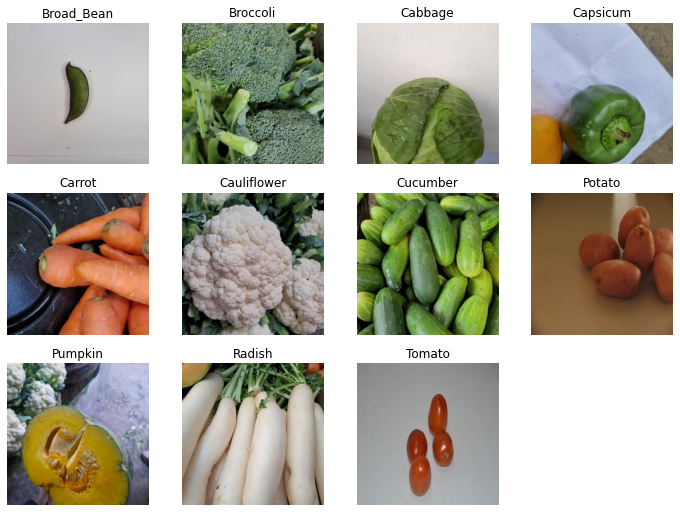

In [4]:
image_categories = os.listdir('C:/Users/manya/Documents/Ironhack/Course/Final-project/images/train') #listado de las categorias de verduras

def plot_images(image_categories):
    
    # Crear figura
    plt.figure(figsize=(12, 12))
    for label, category in enumerate(image_categories): #enumerate añade un contador a la lista 
        
        # Load images for the ith category
        image_path = train_path + '/' + category 
        images_in_folder = os.listdir(image_path) #lista de todas las imagenes de la carpeta
        first_image_of_folder = images_in_folder[0] #solo plotearemos la primera imagen de cada category
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0 #Convertir imagen en array 
        
        
        # Crear subplot y agregar las imagenes
        plt.subplot(4, 4, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')
        
    plt.show()

plot_images(image_categories)


In [5]:
# Creating Image Data Generator for train, validation and test set

# 1. Train Set
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 2. Validation Set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator = train_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 3. Test Set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = train_gen.flow_from_directory(
                                            test_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')


Found 11000 images belonging to 11 classes.
Found 2200 images belonging to 11 classes.
Found 2200 images belonging to 11 classes.


In [6]:
class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
print(class_map)

{0: 'Broad_Bean', 1: 'Broccoli', 2: 'Cabbage', 3: 'Capsicum', 4: 'Carrot', 5: 'Cauliflower', 6: 'Cucumber', 7: 'Potato', 8: 'Pumpkin', 9: 'Radish', 10: 'Tomato'}


In [10]:
model = Sequential() # model object

# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(11, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 87616)             0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [11]:
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist = model.fit(train_image_generator, 
                 epochs=100, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 11000//32, 
                 validation_steps = 2200//32, 
                 callbacks=early_stopping)

Epoch 1/100
343/343 [==============================] - 374s 1s/step - loss: 1.2199 - accuracy: 0.5770 - val_loss: 0.5298 - val_accuracy: 0.8392
Epoch 2/100
343/343 [==============================] - 161s 468ms/step - loss: 0.4873 - accuracy: 0.8411 - val_loss: 0.2869 - val_accuracy: 0.9150
Epoch 3/100
343/343 [==============================] - 158s 460ms/step - loss: 0.3221 - accuracy: 0.8951 - val_loss: 0.2835 - val_accuracy: 0.9108
Epoch 4/100
343/343 [==============================] - 158s 461ms/step - loss: 0.2077 - accuracy: 0.9335 - val_loss: 0.2699 - val_accuracy: 0.9242
Epoch 5/100
343/343 [==============================] - 159s 463ms/step - loss: 0.1532 - accuracy: 0.9507 - val_loss: 0.1768 - val_accuracy: 0.9513
Epoch 6/100
343/343 [==============================] - 160s 466ms/step - loss: 0.1324 - accuracy: 0.9582 - val_loss: 0.1664 - val_accuracy: 0.9609
Epoch 7/100
343/343 [==============================] - 169s 492ms/step - loss: 0.1047 - accuracy: 0.9670 - val_loss: 0.25

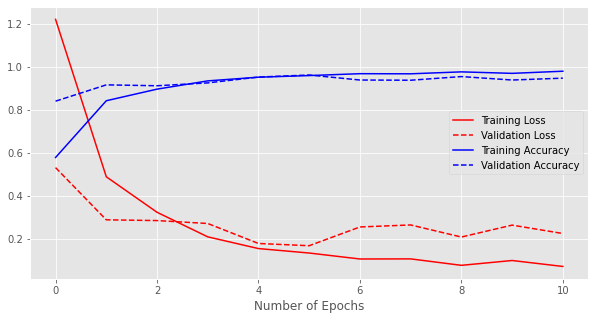

In [12]:
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

In [13]:
model.evaluate(test_image_generator)

69/69 [==============================] - 52s 760ms/step - loss: 0.2339 - accuracy: 0.9450


[0.23390191793441772, 0.9449999928474426]

1/1 [==============================] - 0s 57ms/step


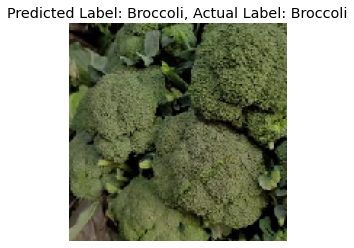

In [16]:
test_image_path = '../images/test/Broccoli/1013.jpg'

def generate_predictions(test_image_path, actual_label):
    
    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

# call the function
generate_predictions(test_image_path, actual_label='Broccoli')

1/1 [==============================] - 0s 59ms/step


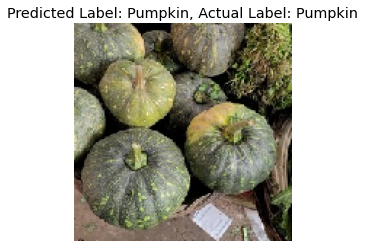

In [17]:
generate_predictions ('../images/test/Pumpkin/1013.jpg', actual_label= 'Pumpkin')

1/1 [==============================] - 0s 55ms/step


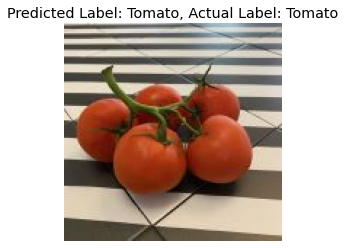

In [19]:
generate_predictions("C:/Users/manya/OneDrive/Imágenes/IMG-8548.jpg", actual_label='Tomato')